# Heading


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path ='/home/nrw/Documents/projects_Spring2018/howe299r/Experiments/26Mar2018/data/deltas/'
viz = '07April_ID1.csv'
imu = '07IMU.csv'
vizf = pd.read_csv(path+viz,sep='\t')
vizf.dropna(how="all", inplace=True) 
imuf = pd.read_csv(path+imu,sep='\t')
imuf.dropna(how="all", inplace=True) 

yaw, pitch, roll = vizf["yaw"], vizf["pitch"], vizf["roll"]
yaw, pitch, roll = vizf["yaw"]*57.29578, vizf["pitch"]*57.29578, vizf["roll"]*57.29578
yaw, pitch, roll = yaw,pitch, roll 
xIMU,yIMU,zIMU = imuf["x"], imuf["y"], imuf["z"]

forces = np.arange(0,yaw.shape[0]*10,10)
forces =[0,10,20,30,40,60,70,80,90,100,110]

print(len(yaw))
print(len(forces))

#print(len(yaw))
#print(len(yIMU))
#print(yIMU)
#print(roll)
#print(pitch)
#print(len(forces))

11
11


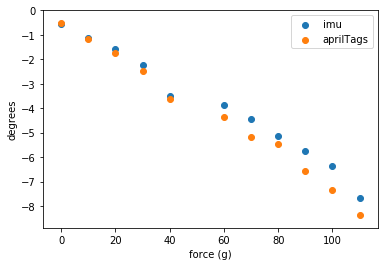

In [26]:
plt.scatter(forces, yIMU, label='imu')
plt.scatter(forces, yaw, label='aprilTags') #???
plt.ylabel('degrees')
plt.xlabel('force (g)')
plt.legend()
plt.show()

In [12]:
import numpy as np
import plotly.plotly as py
import plotly.offline as po
import plotly.graph_objs as go
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

po.init_notebook_mode(connected=True)

trace0 = go.Scatter( x = forces, y = yIMU, mode = 'markers',
    name = 'degrees (by IMU)' )

trace1 = go.Scatter( x = forces, y = yaw, mode = 'markers',
    name = 'true degrees (by apriltag)' )


forces = forces.reshape(-1, 1)
myX = forces
myy = yIMU 
#regr= Ridge(fit_intercept=True, alpha=1.0, random_state=0, normalize=True)
regr = linear_model.LinearRegression()
regr.fit(myX, myy)
coef_ridge = regr.coef_
gridx = np.linspace(myX.min(), myX.max(), 20)
coef_ = regr.coef_ * gridx + regr.intercept_
yPred= regr.predict(myX) 
#plt.plot(gridx, coef_, 'g-', label="ridge regression")

trace2 = go.Scatter( x= gridx, y = coef_,
    name = 'linear fit (w/ridge penalty)' )
           

In [27]:
data = [trace1, trace0, trace2]

layout = go.Layout(
    title='Force vs Degrees of Deflection',
    yaxis=dict(title='degrees'),
    xaxis=dict(title='Force (in grams)'),
    legend=dict(x=.1, y=-.5) )

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(yIMU, yPred))
print('Variance score (ideal 1): %.2f' % r2_score(yIMU, yPred)) 
po.iplot(fig)
#po.plot(fig, filename='temp_plot.html')

Coefficients: 
 [-0.06897727]
Mean squared error: 0.04
Variance score (ideal 1): 0.99


In [16]:
resid = yIMU - yPred
layout = go.Layout(
    title='Force vs Degrees of Deflection',
    yaxis=dict(title='degrees'),
    xaxis=dict(title='Force (in grams)'),
    legend=dict(x=.1, y=-.5) )
traceResid = go.Scatter( x = yIMU, y = resid, mode = 'markers',
    name = 'resid' )
data = [traceResid]
layout = go.Layout(
    title='Residuals',
    yaxis=dict(title='residuals'),
    xaxis=dict(title='yIMU (degrees)'),
    legend=dict(x=.1, y=-.5) )

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)
print(yIMU)
print(resid)

0    -0.5625
1    -1.1250
2    -1.5625
3    -2.2500
4    -3.5000
5    -3.8750
6    -4.4375
7    -5.1250
8    -5.7500
9    -6.3750
10   -7.6875
Name: y, dtype: float64
0    -0.170455
1    -0.043182
2     0.209091
3     0.211364
4    -0.348864
5    -0.034091
6     0.093182
7     0.095455
8     0.160227
9     0.225000
10   -0.397727
Name: y, dtype: float64
